In [1]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from IPython.display import Image, display

## EDA and Pre-Processing of Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
driveurl = '/content/drive/MyDrive/MRP/Data/Synthetic_Financial_Accounting_Dataset.csv'
data_df = pd.read_csv(driveurl)
data_df.head(10) 

,BELNR,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
0,288203,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,324441,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,133537,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,331521,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,375333,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular
5,327203,C1,C15,C6,C68,A1,B2,357627.56,704520.00,regular
6,292545,C4,C47,C2,C28,A2,B3,955576.84,128328.00,regular
7,335839,C1,C19,C1,C17,A1,B1,41769.26,0.00,regular
8,369064,C4,C40,C9,C97,A2,B1,44309.79,0.00,regular
9,138724,C6,C69,C1,C12,A2,B1,466720.45,43843.00,regular


In [4]:
data_df.label.value_counts()
label = data_df.pop('label')

### Investigating Anomaly classes and null values in the dataset

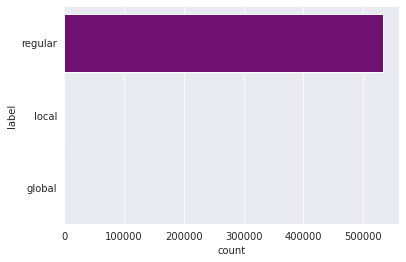

In [5]:
sns.countplot(y=label, data=data_df, color="purple")

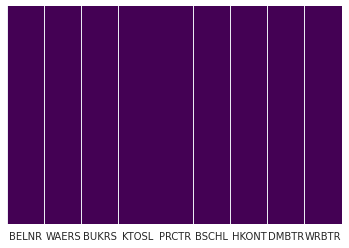

In [6]:
sns.heatmap(data_df.isnull(),cbar=False,yticklabels=False, cmap='viridis')

### Investigating all categorical attributes in the dataset

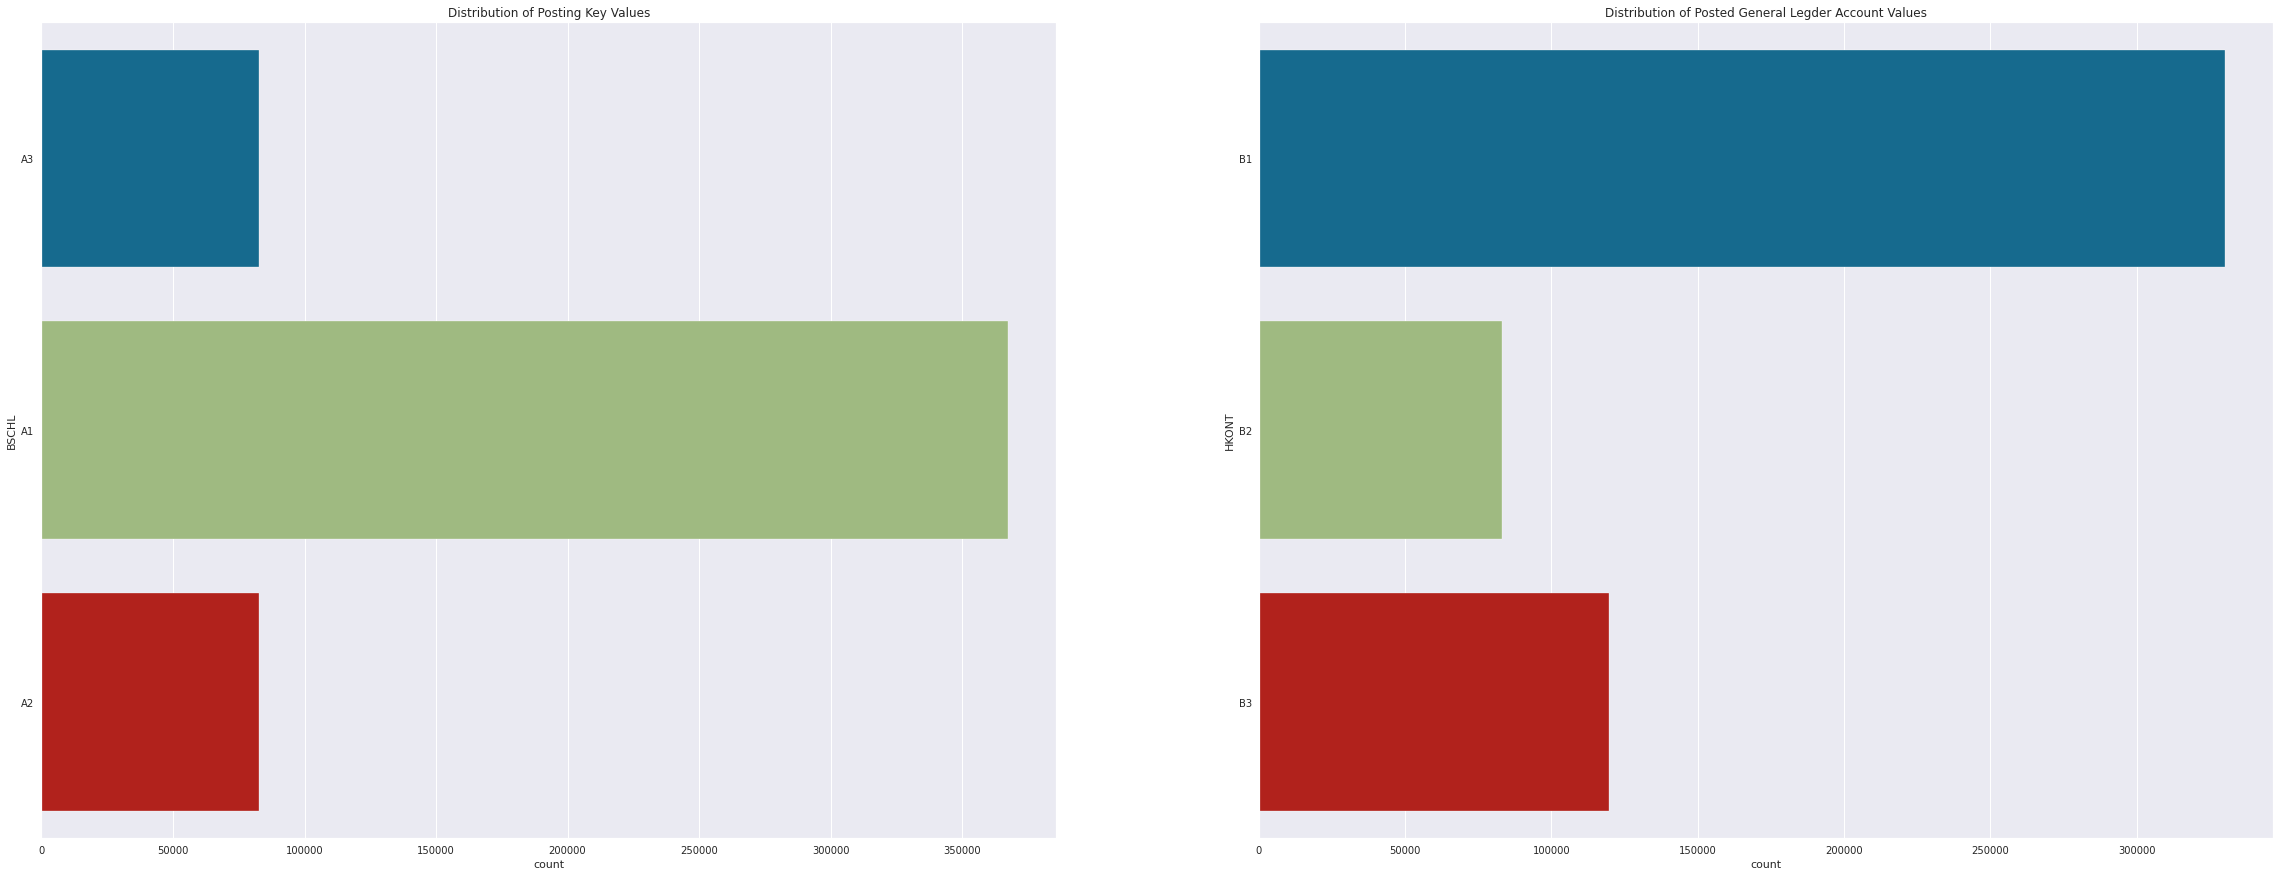

In [ ]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(40)
fig.set_figheight(15)

# plot the distribution of the posting key attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'BSCHL'], ax=ax[0])
g.set_title('Distribution of Posting Key Values')

# plot the distribution of the general ledger account attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'HKONT'], ax=ax[1])
g.set_title('Distribution of Posted General Legder Account Values');

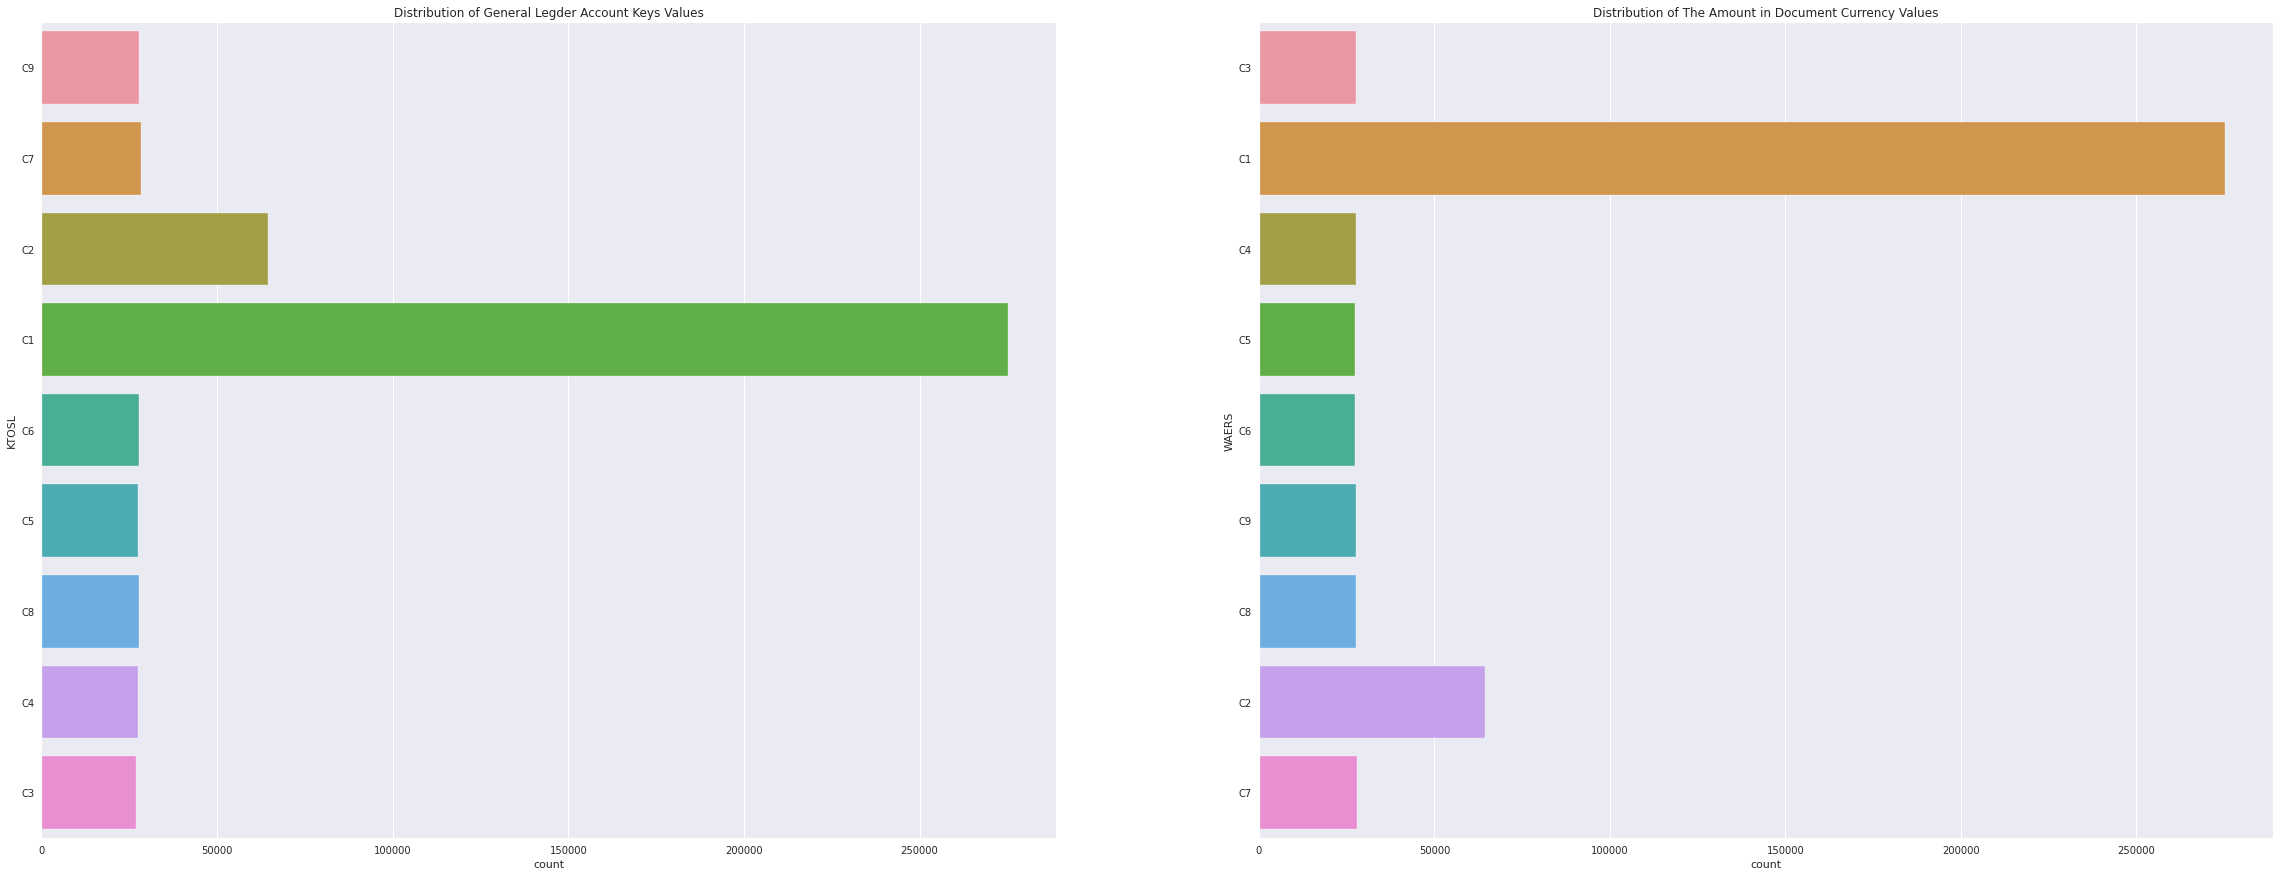

In [ ]:
# prepare to plot general ledger account keys and amount in document currency vales side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(40)
fig.set_figheight(15)

# plot the distribution of the general ledger account key attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'KTOSL'], ax=ax[0])
g.set_title('Distribution of General Legder Account Keys Values');

# plot the distribution of the amount in document currency attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'WAERS'], ax=ax[1])
g.set_title('Distribution of The Amount in Document Currency Values');

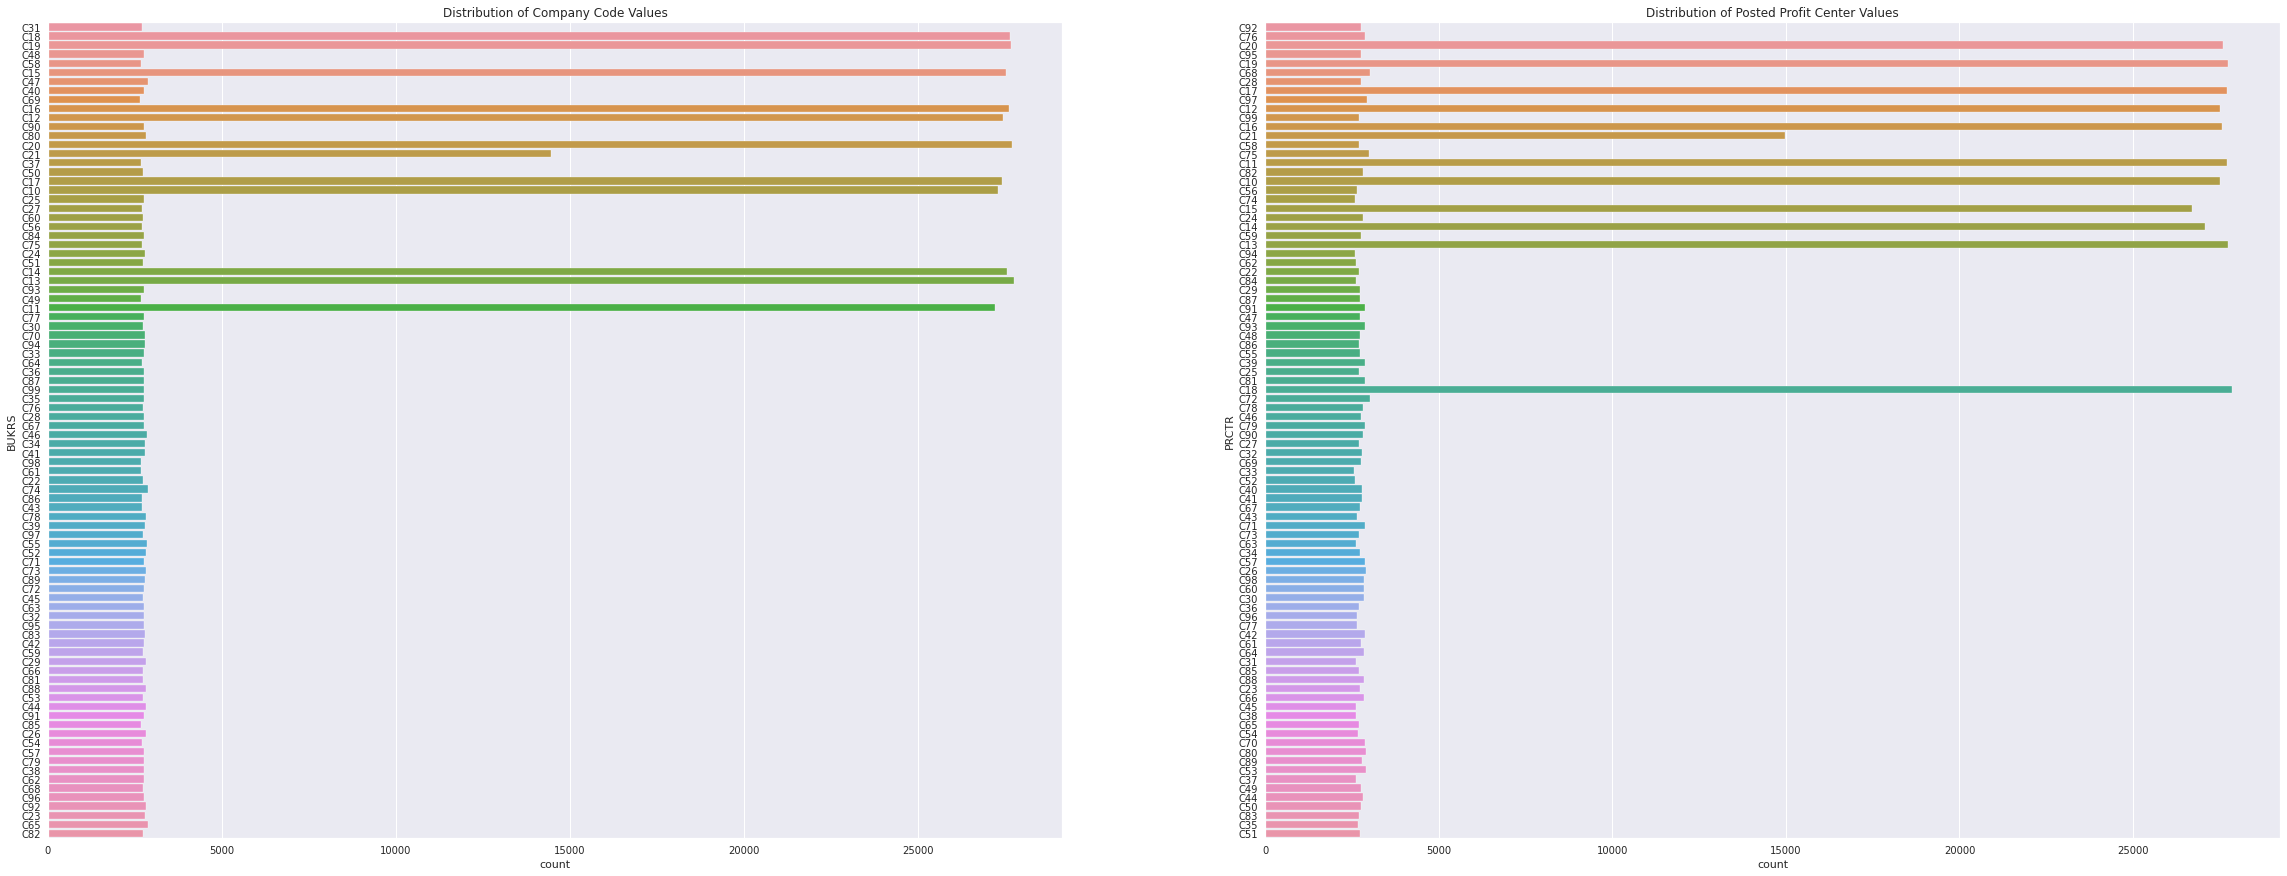

In [ ]:
# prepare to plot company code and posted profit center values side by side
fig, ax = plt.subplots(1,2)
fig.set_figwidth(40)
fig.set_figheight(15)

# plot the distribution of the company code attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'BUKRS'], ax=ax[0])
g.set_title('Distribution of Company Code Values');

# plot the distribution of the posted profit center attribute
g = sns.countplot(y=data_df.loc[label=='regular', 'PRCTR'], ax=ax[1])
g.set_title('Distribution of Posted Profit Center Values');

### Investigate the distribution of amount in local vs document currency values

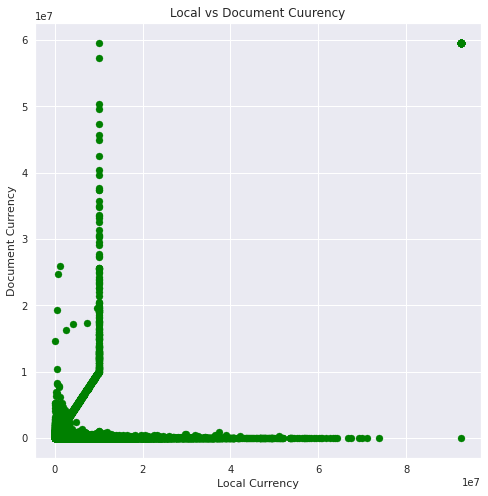

In [ ]:
# Plot scatterplot of amount in local vs document currency values

plt.figure(figsize=(8, 8))
plt.scatter(data_df.DMBTR, data_df.WRBTR,c="green")
plt.xlabel('Local Currency')
plt.ylabel('Document Currency')
plt.title('Local vs Document Cuurency')
plt.show()

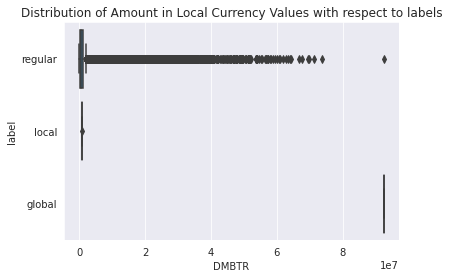

In [21]:
# Plot Boxplot of amount in local vs document currency values with respect to anomaly classes

# box plot of the amount in local currency with labels distribution
g = sns.boxplot(y=label, x='DMBTR', data=data_df)
g.set_title('Distribution of Amount in Local Currency Values with respect to labels');
g.plot();

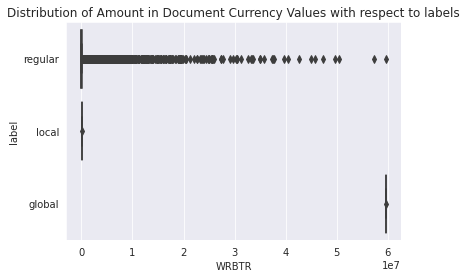

In [19]:
# box plot of tthe amount in document currency with labels distribution
g = sns.boxplot(y=label, x='WRBTR', data=data_df)
g.set_title('Distribution of Amount in Document Currency Values with respect to labels');
g.plot();

Neural Networks are not meant to be trained on category data directly and instead require numeric qualities to be trained on. Applying a method known as "one-hot" encoding is one straightforward approach to achieve this criteria.Using this approach, the 6 categorical characteristics in the original transactional dataset will be "one-hot" encoded to generate a binary ("one-hot") representation of each attribute. This may be accomplished with the Pandas data science library's get dummies() function:

In [ ]:
cat_name = ['KTOSL', 'PRCTR', 'BSCHL', 'HKONT', 'BUKRS', 'WAERS']
data_trans = pd.get_dummies(data_df[cat_name])
data_trans.head(10)

,KTOSL_A19,KTOSL_B06,KTOSL_B12,KTOSL_B83,KTOSL_C1,KTOSL_C2,KTOSL_C3,KTOSL_C39,KTOSL_C4,KTOSL_C5,...,WAERS_U72,WAERS_U94,WAERS_V89,WAERS_W25,WAERS_W59,WAERS_X26,WAERS_Y59,WAERS_Z06,WAERS_Z37,WAERS_Z54
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the distributions of the transactional dataset's two numerical characteristics.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


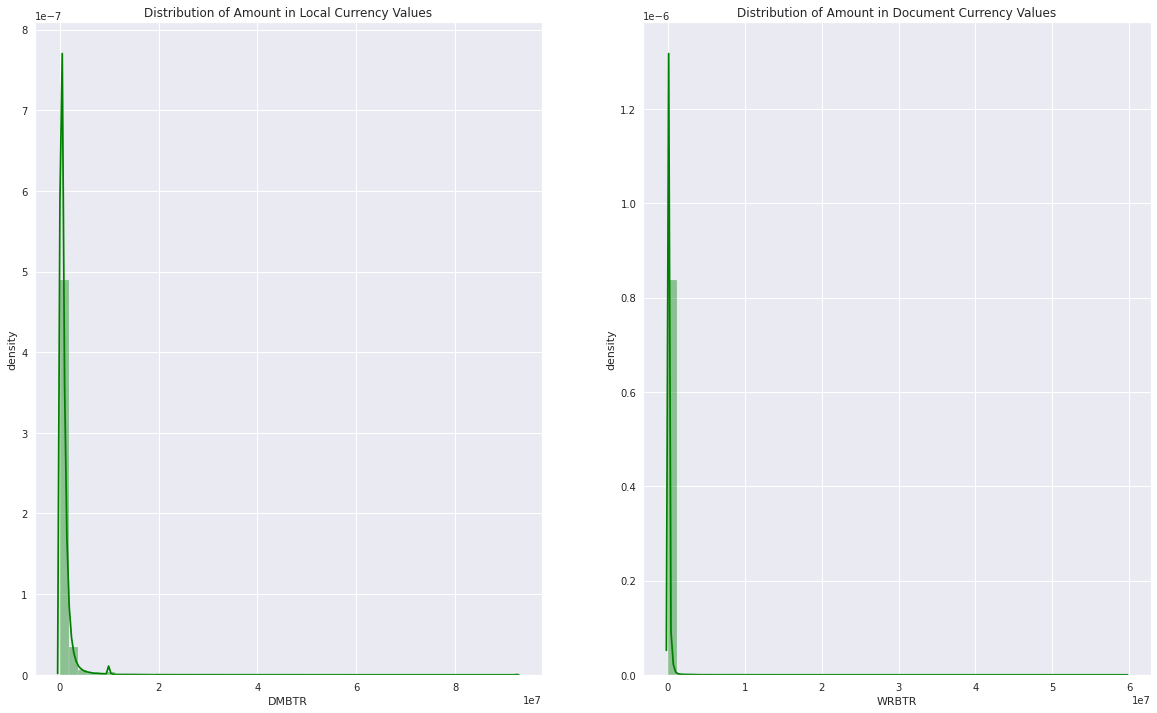

In [ ]:
# Plot distribution od local and document amount values
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(12)

# plot distribution of the local amount attribute
g = sns.distplot(data_df['DMBTR'].tolist(), ax=ax[0], color="green")
g.set_title('Distribution of Amount in Local Currency Values')

# set axis-labels 
ax[0].set_xlabel('DMBTR')
ax[0].set_ylabel('density')

# plot distribution of the document amount attribute
g = sns.distplot(data_df['WRBTR'].tolist(), ax=ax[1], color="green")
g.set_title('Distribution of Amount in Document Currency Values')

# set axis-labels
ax[1].set_xlabel('WRBTR')
ax[1].set_ylabel('density');

As the distribution is skewed and tailed heavily so we have to scaled both variable quantites to range in [0,1].

In [ ]:
# select "DMBTR" vs. "WRBTR" attribute
numeric_attr_names = ['DMBTR', 'WRBTR']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = data_df[numeric_attr_names] + 1e-4
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
data_df_numeric_attr = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


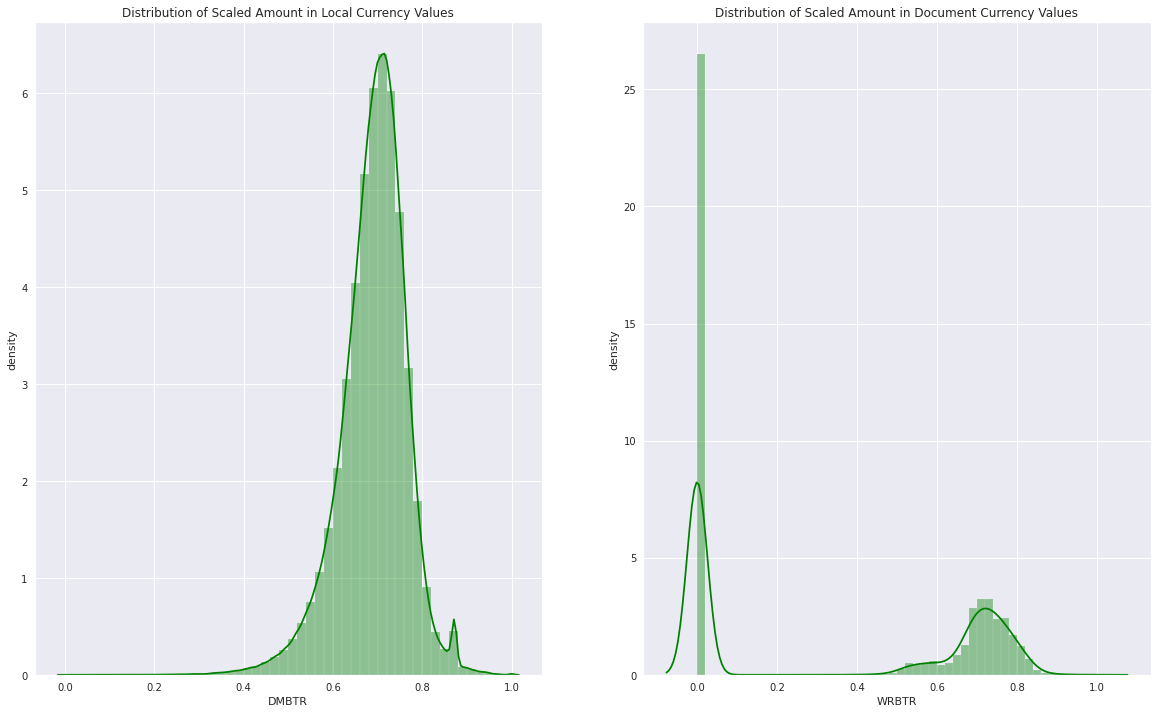

In [ ]:
# Scaled distribution of local and document currency values
fig, ax = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(12)

# plot distribution of the local amount attribute
g = sns.distplot(data_df_numeric_attr['DMBTR'].tolist(), ax=ax[0], color="green")
g.set_title('Distribution of Scaled Amount in Local Currency Values')

# set axis-labels 
ax[0].set_xlabel('DMBTR')
ax[0].set_ylabel('density')

# plot distribution of the local amount attribute
g = sns.distplot(data_df_numeric_attr['WRBTR'].tolist(), ax=ax[1], color="green")
g.set_title('Distribution of Scaled Amount in Document Currency Values')

# set axis-labels
ax[1].set_xlabel('WRBTR')
ax[1].set_ylabel('density');

Examine the scaled distributions of each characteristics in terms of the different types of anomalies.

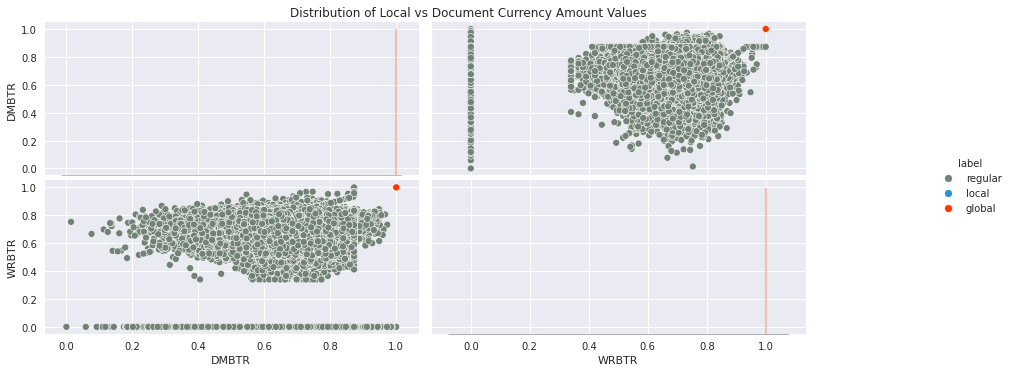

In [ ]:
numeric_attr_vis = data_df_numeric_attr.copy()
numeric_attr_vis['label'] = label
g = sns.pairplot(data=numeric_attr_vis, vars=numeric_attr_names, hue='label', palette={'regular':'#738276', 'local': '#2496cd', 'global': '#ff3800'})
g.fig.suptitle('Distribution of Local vs Document Currency Amount Values', y=1.02)
g.fig.set_size_inches(15, 5)

### T-SNE projection

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


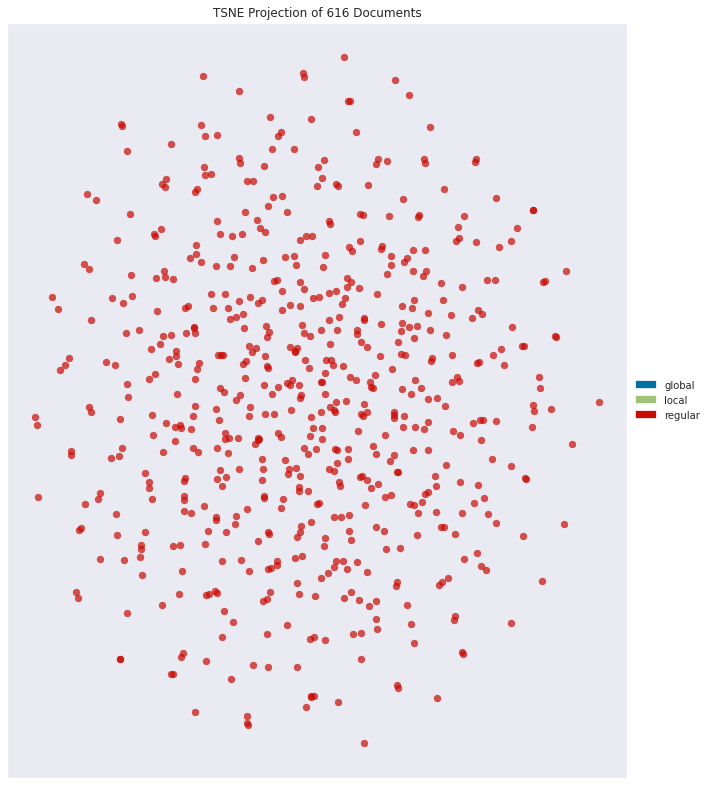

In [ ]:
# Import needed packages
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from sklearn.preprocessing import LabelEncoder
# Prepare the data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data_trans)
#label_encoder = LabelEncoder().fit(label)
#y = label_encoder.transform(label)
# Plot t-SNE
y=label
tsne = TSNEVisualizer(size=(1000,1000))
tsne.fit_transform(X, y)
tsne.poof();

### Principal Component Analysis (PCA)

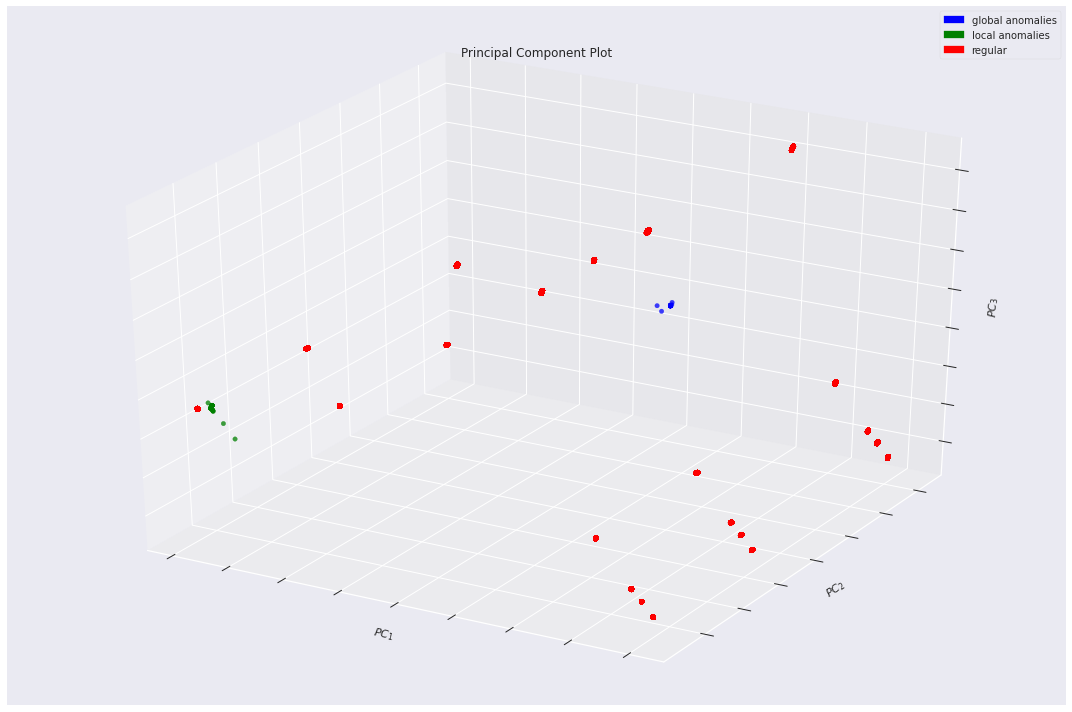

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz

label_encoder = LabelEncoder().fit(label)
y = label_encoder.transform(label)
X=data_trans
#y=labels_pca['target']
classes = ['global anomalies', 'local anomalies', 'regular']
visualizer = RadViz(size=(1080, 720))
visualizer = PCA(
    scale=False, projection=3, classes=classes, color=set_palette('reset')
)
visualizer.fit_transform(X, y)
visualizer.show()